In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from data_generator import *

# Charger le dataset
df = pd.read_csv('train_df.csv')

#vérifier la distribution des classes dans la colonne "outcome"

class_distribution = df['outcome'].value_counts()

#print(class_distribution)
#vérifier s'il y a des valeurs manquantes dans le dataset
missing_values = df.isnull().sum()



In [2]:
# Vérifier s'il y a des valeurs manquantes
print(missing_values)


duration                       0
protocol_type                  0
flag                           0
src_bytes                      0
land                           0
wrong_fragment                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
srv_count                      0
serror_rate                    0
rerror_rate                    0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_r

In [3]:
df

,duration,protocol_type,flag,src_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,outcome
0,0,tcp,SH,0,0,0,0,0,0,0,...,144,1,0.01,0.94,0.94,1.00,0.0,0.0,19,nmap
1,0,udp,SF,105,0,0,0,0,0,0,...,255,245,0.96,0.02,0.00,0.00,0.0,0.0,21,normal
2,0,udp,SF,33,0,0,0,0,0,0,...,255,255,1.00,0.01,0.00,0.00,0.0,0.0,21,normal
3,0,tcp,S0,0,0,0,0,0,0,0,...,255,13,0.05,0.00,1.00,1.00,0.0,0.0,18,neptune
4,0,udp,SF,43,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,18,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72823,0,tcp,S0,0,0,0,0,0,0,0,...,255,23,0.09,0.00,1.00,1.00,0.0,0.0,21,neptune
72824,0,udp,SF,43,0,0,0,0,0,0,...,255,175,0.69,0.00,0.00,0.00,0.0,0.0,20,normal
72825,0,tcp,S0,0,0,0,0,0,0,0,...,255,15,0.06,0.00,1.00,1.00,0.0,0.0,20,neptune
72826,0,tcp,S0,0,0,0,0,0,0,0,...,255,4,0.02,0.00,1.00,1.00,0.0,0.0,20,neptune


In [4]:
# Encoder les variables catégorielles 'protocol_type' et 'flag' avec one-hot encoding
 
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'flag'], drop_first=True)

# Afficher les premières lignes du dataset encodé
#print(df_encoded.head())


In [6]:
print(df['protocol_type'].unique())
print(df['flag'].unique())


['tcp' 'udp' 'icmp']
['SH' 'SF' 'S0' 'RSTR' 'REJ' 'RSTO' 'OTH' 'RSTOS0' 'S2' 'S1' 'S3']


In [9]:
# Encodage des variables catégorielles

categorical_columns = ['protocol_type', 'outcome', 'flag']

# Appliquer One-Hot Encoding sur ces colonnes

df_encoded = pd.get_dummies(df, columns=categorical_columns)

#test_df_encoded = pd.get_dummies(test_df, columns=categorical_columns)
# Assurer que les colonnes encodées dans train et test sont identiques

df_encoded, test_df_encoded = df_encoded.align(df_encoded, join='inner', axis=1)

# Afficher les premières lignes pour vérifier
#print("Train set après encodage :")
#print(df_encoded.head())


In [8]:
df_encoded

,duration,src_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,0,105,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,33,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,0,43,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72823,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
72824,0,43,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
72825,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
72826,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


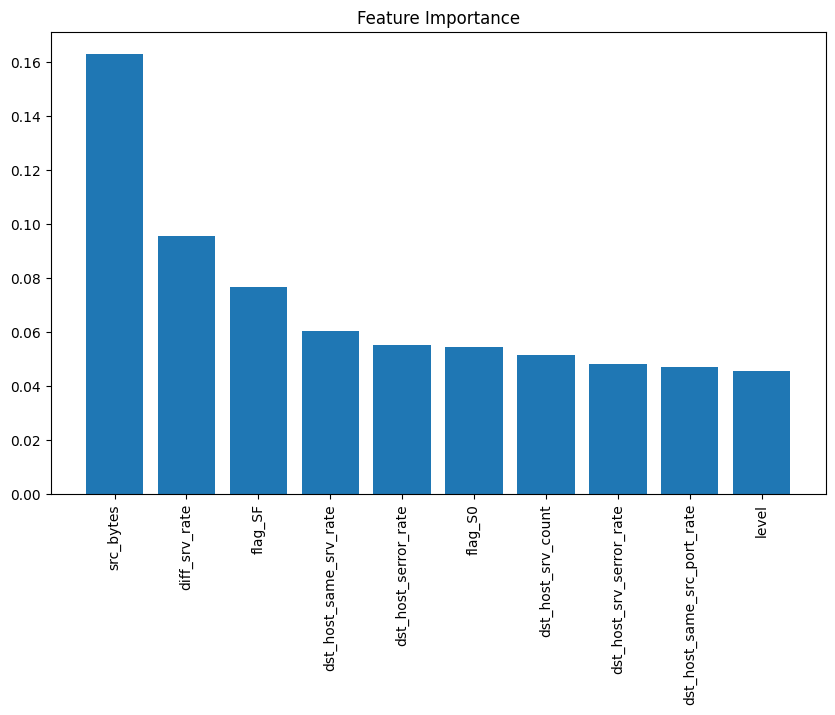

In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner toutes les colonnes qui commencent par 'outcome_'
outcome_columns = [col for col in df_encoded.columns if col.startswith('outcome_')]

# Conserver les caractéristiques sans les colonnes 'outcome_'
X = df_encoded.drop(outcome_columns, axis=1)

# Utiliser toutes les colonnes 'outcome_' comme cible (pour une classification multi-classes)
y = df_encoded[outcome_columns]

# Entraîner un modèle RandomForest pour obtenir l'importance des caractéristiques
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obtenir les importances des caractéristiques
importances = model.feature_importances_

# Trier les caractéristiques par importance
indices = np.argsort(importances)[::-1]

# Afficher les 10 caractéristiques les plus importantes
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=90)

plt.show()


In [11]:
#Étape 1 : Préparation des données

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher les dimensions des ensembles pour s'assurer que tout est correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Créer une seule colonne pour 'y' à partir des colonnes 'outcome_' (une seule classe par observation)
y_single = y.idxmax(axis=1)

# Ensuite, utiliser 'y_single' pour la division des données
X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.3, random_state=42)

# Afficher les dimensions des ensembles pour s'assurer que tout est correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(50979, 45) (21849, 45) (50979, 21) (21849, 21)
(50979, 45) (21849, 45) (50979,) (21849,)


In [18]:
#Modèle 1 : Arbre de décision (Decision Tree)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Entraîner un modèle d'Arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
dt_predictions = dt_model.predict(X_test)

# Calculer et afficher la précision
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")


Decision Tree Accuracy: 0.9940500709414618


In [12]:
#SVM (Support Vector Machines) :
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# entraîner un modèle SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# prédictions sur l'ensemble de test
svm_predictions = svm_model.predict(X_test)

# calculer et afficher la précision
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 0.5472103986452469


In [13]:
#Réseau de neurones (Neural Networks)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Entraîner un modèle de réseau de neurones (MLP)
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
nn_predictions = nn_model.predict(X_test)

# Calculer et afficher la précision
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy}")


Neural Network Accuracy: 0.9414618518009977


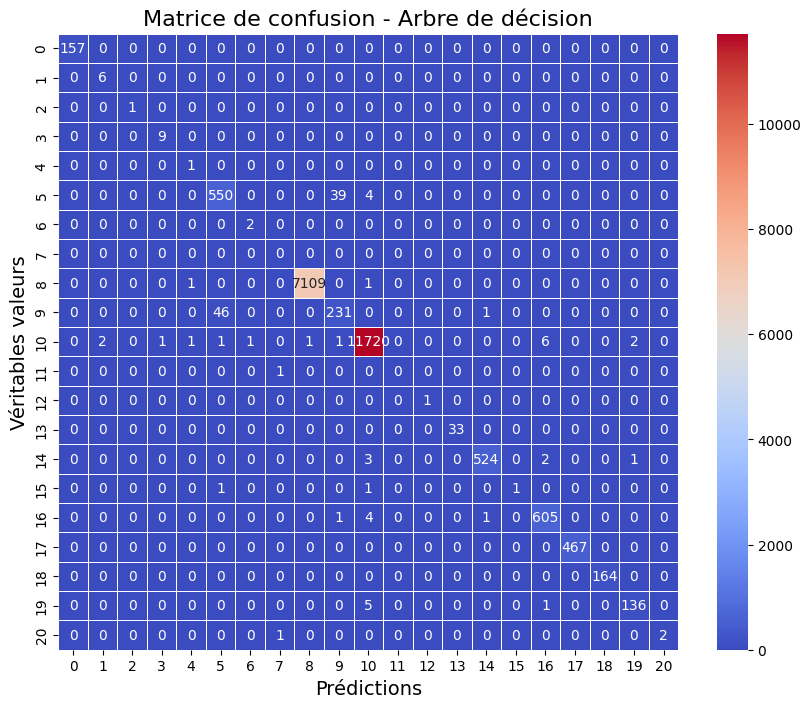

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Générer la matrice de confusion avec les données
cm = confusion_matrix(y_test, dt_predictions)

# Créer une figure pour afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 8))

# Utiliser seaborn pour créer une heatmap avec des valeurs annotées dans chaque cellule
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', linewidths=.5)

# Ajouter des labels et un titre
plt.title('Matrice de confusion - Arbre de décision', fontsize=16)
plt.xlabel('Prédictions', fontsize=14)
plt.ylabel('Véritables valeurs', fontsize=14)

# Afficher la figure
plt.show()


In [21]:
from sklearn.metrics import classification_report
import pandas as pd
# Générer le rapport de classification
report = classification_report(y_test, dt_predictions, output_dict=True)

# Transformer le rapport en DataFrame pour un affichage plus lisible
report_df = pd.DataFrame(report).transpose()

# Afficher le DataFrame
print(report_df)

C:\Users\bekit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bekit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bekit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:15

                         precision    recall  f1-score      support
outcome_back              1.000000  1.000000  1.000000    157.00000
outcome_buffer_overflow   0.750000  1.000000  0.857143      6.00000
outcome_ftp_write         1.000000  1.000000  1.000000      1.00000
outcome_guess_passwd      0.900000  1.000000  0.947368      9.00000
outcome_imap              0.333333  1.000000  0.500000      1.00000
outcome_ipsweep           0.919732  0.927487  0.923594    593.00000
outcome_land              0.666667  1.000000  0.800000      2.00000
outcome_loadmodule        0.000000  0.000000  0.000000      0.00000
outcome_neptune           0.999859  0.999719  0.999789   7111.00000
outcome_nmap              0.849265  0.830935  0.840000    278.00000
outcome_normal            0.998467  0.998637  0.998552  11736.00000
outcome_perl              0.000000  0.000000  0.000000      1.00000
outcome_phf               1.000000  1.000000  1.000000      1.00000
outcome_pod               1.000000  1.000000  1.

C:\Users\bekit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bekit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
#Optimisation des hyperparamètres avec GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définir les valeurs possibles pour les hyperparamètres à tester
param_grid = {
    'max_depth': [3, 5, 10, None],  # Limiter la profondeur de l'arbre
    'min_samples_split': [2, 10, 20],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 5, 10]  # Nombre minimum d'échantillons dans une feuille
}

# Configurer GridSearchCV : recherche systématique des meilleurs hyperparamètres
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Entraîner GridSearchCV pour trouver les meilleurs paramètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Utiliser le meilleur modèle trouvé pour faire des prédictions
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

# Calculer la précision du meilleur modèle
best_accuracy = accuracy_score(y_test, best_predictions)
print(f"Précision du meilleur modèle après GridSearch : {best_accuracy}")


C:\Users\bekit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Précision du meilleur modèle après GridSearch : 0.9940500709414618


In [19]:
y_train

26338        outcome_back
59670      outcome_normal
68891      outcome_normal
43024    outcome_teardrop
54763      outcome_normal
               ...       
37194      outcome_normal
6265      outcome_neptune
54886      outcome_normal
860       outcome_ipsweep
15795     outcome_neptune
Length: 50979, dtype: object

In [18]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Projet IA  Bereket TADIWOS RS1 M1", explorative=True)
profile.to_file("Projet.html")

C:\Users\bekit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\bekit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]
